In [1]:
# chargement via Keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns

# Pour la reproductibilité
tf.random.set_seed(42)

# Chargement du dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #60k pour training, 10k pour le test

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 51s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 13s 3us/step


<h2 style="color:#1E90FF;">Étape 1 – Exploration du jeu de données</h2>

Dimensions du train set : (60000, 28, 28)
Dimensions du test set : (10000, 28, 28)


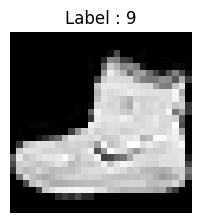

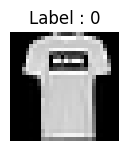

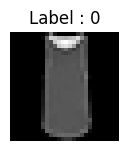

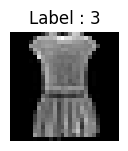

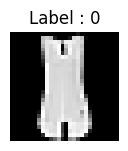

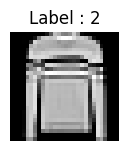

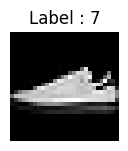

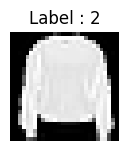

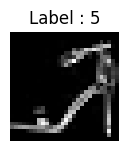

In [4]:
# dimensions
print("Dimensions du train set :", X_train. shape)
print("Dimensions du test set :", X_test.shape)

#visualisation d'exemple
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i +1)
    plt.imshow(X_train[i], cmap='gray' )
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')
    plt.show()

<h4><b>1. Que remarquez-vous sur la nature des données et la taille des images ?</b>

Les données sont des images en niveaux de gris représentant des vêtements (10 classes).
Chaque image a une taille de 28×28 pixels.
Le jeu contient 60 000 images d’entraînement et 10 000 de test.

<h2 style="color:#1E90FF;">Étape 2 – Prétraitement des données</h2>

In [17]:
from tensorflow.keras.utils import to_categorical

# Normalisation des pixels entre 0 et 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encodage one-hot des labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

<h4><b>1. Pourquoi faut-il normaliser les images 


La normalisation (division par 255) permet de ramener les valeurs des pixels entre 0 et 1, ce qui :

1)facilite et accélère l’apprentissage du réseau de neurones,

2)évite les grands écarts de valeurs entre les entrées,


<h4><b>2. Quelle est l’importance du one-hot encoding dans un problème de classification
multiclasse ?

Le one-hot encoding transforme chaque label (ex. 0–9) en un vecteur binaire indiquant la classe correcte.

<h2 style="color:#1E90FF;">Étape 3 – Création d’un modèle dense (ANN)
</h2>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

model = Sequential([
Input(shape=(28, 28)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.2),
Dense(64, activation='relu'),
Dense(10, activation='softmax')

])

model. summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

<h4><b>Compilation et entraînement

In [29]:
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy']
)

history = model.fit(
X_train, y_train_cat, 
epochs=10,
batch_size=128,
validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7780 - loss: 0.6270 - val_accuracy: 0.8469 - val_loss: 0.4287
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8481 - loss: 0.4246 - val_accuracy: 0.8561 - val_loss: 0.3949
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8625 - loss: 0.3833 - val_accuracy: 0.8630 - val_loss: 0.3744
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8680 - loss: 0.3583 - val_accuracy: 0.8683 - val_loss: 0.3654
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8744 - loss: 0.3406 - val_accuracy: 0.8689 - val_loss: 0.3537
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8820 - loss: 0.3244 - val_accuracy: 0.8717 - val_loss: 0.3450
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8849 - loss: 0.3142 - val_accuracy: 0.8752 - val_loss: 0.3421
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8869 - loss: 0.3063 - val_accuracy: 0.

<h4><b>Visualisation

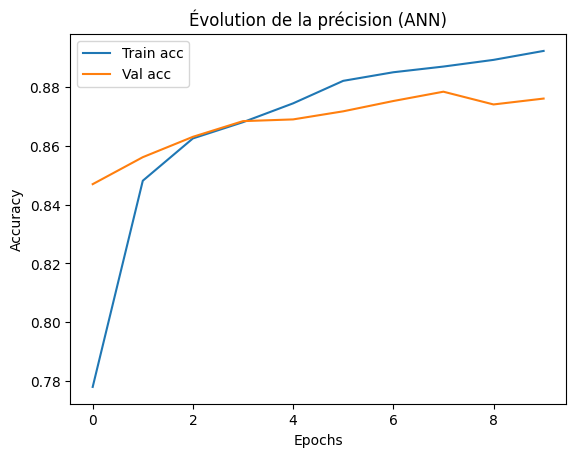

In [32]:
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Évolution de la précision (ANN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

<h4><b>1. Pourquoi utilise-t-on la fonction d’activation ReLU ici ?


La fonction ReLU (Rectified Linear Unit) permet d’introduire de la non-linéarité dans le réseau tout en :

1)accélérant l’apprentissage,

2)réduisant le problème du gradient nul,


️<h4><b>2. Quelle est la différence entre accuracy et val_accuracy ?



accuracy : précision calculée sur les données d’entraînement.

val_accuracy : précision calculée sur les données de validation (non vues pendant l’entraînement), utilisée pour évaluer la capacité de généralisation du modèle

<h4><b> 3. Que se passe-t-il si l’on augmente le nombre d’époques à 50 ?

Le modèle peut mieux apprendre au début,

mais après un certain point, il risque de surapprendre (overfitting).

In [40]:
#Evaluation finale
test_loss, test_acc = model. evaluate(X_test, y_test_cat)
print("Precision sur le test set :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3641
Precision sur le test set : 0.8697999715805054


<h2 style="color:#1E90FF;">Étape 4 — Introduction aux Fonctions d’Activation</h2>

🔹 Entraînement avec activation : sigmoid
🔹 Entraînement avec activation : tanh
🔹 Entraînement avec activation : relu
🔹 Entraînement avec activation : LeakyReLU

Résultats finaux : {'sigmoid': 0.7689999938011169, 'tanh': 0.7879999876022339, 'relu': 0.7820000052452087, 'LeakyReLU': 0.7960000038146973}


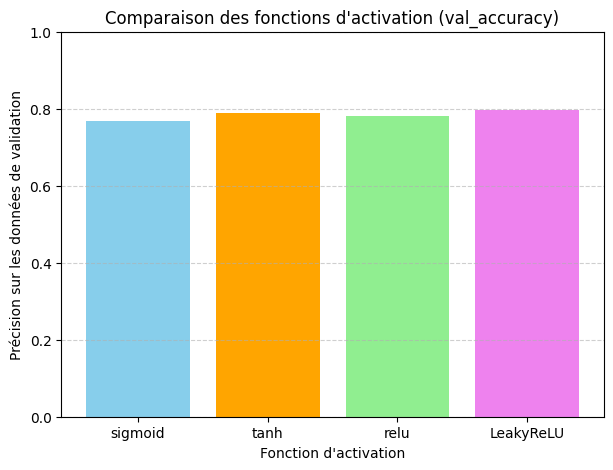

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, LeakyReLU
import matplotlib.pyplot as plt

# --- Jeu de données réduit pour exécution rapide ---
X_small = X_train[:5000]
y_small = y_train_cat[:5000]

# --- Liste des activations à tester ---
activations = ['sigmoid', 'tanh', 'relu']
results = {}

# --- Entraînement pour chaque activation ---
for act in activations:
    print(f"🔹 Entraînement avec activation : {act}")
    model = Sequential([
        Input(shape=(28,28)),
        Flatten(),
        Dense(64, activation=act),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    h = model.fit(X_small, y_small, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
    results[act] = h.history['val_accuracy'][-1]

# --- Cas spécial : LeakyReLU ---
print("🔹 Entraînement avec activation : LeakyReLU")
model_leaky = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(64),
    LeakyReLU(0.1),
    Dense(10, activation='softmax')
])
model_leaky.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
h = model_leaky.fit(X_small, y_small, epochs=3, batch_size=128, validation_split=0.2, verbose=0)
results['LeakyReLU'] = h.history['val_accuracy'][-1]

# --- Affichage des résultats ---
print("\nRésultats finaux :", results)

# --- Graphique comparatif ---
plt.figure(figsize=(7,5))
plt.bar(results.keys(), results.values(), color=['skyblue','orange','lightgreen','violet'])
plt.title("Comparaison des fonctions d'activation (val_accuracy)")
plt.xlabel("Fonction d'activation")
plt.ylabel("Précision sur les données de validation")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<h4><b>1. Quelle fonction d’activation donne les meilleurs résultats ?


En général, la ReLU ou la LeakyReLU donnent les meilleures performances en validation.
Elles permettent un apprentissage plus rapide et une meilleure convergence que sigmoid ou tanh.

<h4><b>2. Pourquoi les fonctions sigmoïde et tanh sont moins utilisées dans les couches cachées ?

Parce qu’elles :provoquent le problème du gradient qui s’annule (les poids apprennent très lentement),ralentissent l’entraînement,

et sont moins efficaces pour les réseaux profonds.

<h4><b>3. À quoi sert LeakyReLU ?

Le LeakyReLU est une version améliorée de ReLU :
il laisse passer une petite pente négative (ex. 0.1) quand l’entrée est négative,
ce qui évite le blocage des neurones à zéro (le problème des “neurones morts”).

<h2 style="color:#1E90FF;">Étape 5 : Modèle CNN (Convolutional Neural Network)</h2>

<h4><b> Création du modèle CNN

In [64]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
Input(shape=(28, 28, 1)),
Conv2D(32, (3,3), activation='relu'),
MaxPooling2D((2,2)),
Conv2D(64, (3,3), activation='relu'),
MaxPooling2D((2,2)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy' ])
cnn.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

<h4><b> Entraînement

In [67]:
istory_cnn = cnn.fit(
X_train_cnn, y_train_cat,
epochs=10,
batch_size=128,
validation_split=0.2

)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7679 - loss: 0.6433 - val_accuracy: 0.8555 - val_loss: 0.4157
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8514 - loss: 0.4107 - val_accuracy: 0.8692 - val_loss: 0.3576
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.8716 - loss: 0.3531 - val_accuracy: 0.8817 - val_loss: 0.3235
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8841 - loss: 0.3184 - val_accuracy: 0.8874 - val_loss: 0.3068
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8918 - loss: 0.2947 - val_accuracy: 0.8960 - val_loss: 0.2839
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.8989 - loss: 0.2739 - val_accuracy: 0.8949 - val_loss: 0.2842
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.9046 - loss: 0.2581 - val_accuracy: 0.9026 - val_loss: 0.2650
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9122 - loss: 0.2404 - 

<h4><b> Évaluation

In [72]:
test_loss, test_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print("Precision CNN sur test set :", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9047 - loss: 0.2655
Precision CNN sur test set : 0.904699981212616


<h4><b>1. Quelle est la différence entre un ANN et un CNN ?

<b>ANN (Artificial Neural Network) :</b>
Chaque neurone est connecté à tous les neurones de la couche précédente (réseau dense).

<b>CNN (Convolutional Neural Network) :</b>
Utilise des couches de convolution qui analysent localement les pixels (voisinage).


<h4><b>2. Pourquoi le CNN donne-t-il généralement de meilleurs résultats ?

Parce qu’il :
extrait automatiquement les caractéristiques visuelles (bords, textures, motifs),
réduit le nombre de paramètres (moins de surapprentissage),
reconnaît mieux les structures locales d’une image .
 meilleure précision et généralisation sur les images.

<h4><b>3. Quel est le rôle des couches de Pooling ?

 elles compressent l’information sans la perdre.

<h2 style="color:#1E90FF;">Étape 6 — Visualisation des performances</h2>

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(cnn.predict(X_test_cnn), axis=1)
ConfusionMatrixDisplay. from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matrice de confusion - CNN")
plt.show()

️<h4><b>1 Quelles classes sont le plus souvent confondues ?

On remarque dans la matrice :

La classe 0 (T-shirt/top) est souvent confondue avec la classe 6 (shirt) → les vêtements se ressemblent visuellement.

La classe 2 (pullover) est aussi parfois confondue avec classe 4 (coat) ou classe 6 (shirt).
Ces confusions viennent du fait que ces articles ont des formes et textures similaires.

<h4><b>2 Comment peut-on réduire ces erreurs de classification ?

Plusieurs stratégies possibles :
Augmenter la complexité du modèle : ajouter plus de couches convolutionnelles ou des filtres plus nombreux.
Utiliser la data augmentation : rotations, zooms, flips… pour rendre le modèle plus robuste aux variations visuelles.
 Augmenter le nombre d’époques d’entraînement (sans surapprentissage).
 Ajuster les hyperparamètres : batch size, taux d’apprentissage, dropout, etc.
 Utiliser des modèles plus avancés : architectures préentraînées (ex. ResNet, VGG, MobileNet) via le transfer learning

<h2 style="color:#1E90FF;">Étape 7 : Data Augmentation</h2>

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
rotation_range=10,
zoom_range=0.1,
horizontal_flip=True

)

datagen.fit(X_train_cnn)

cnn.fit(
datagen.flow(X_train_cnn, y_train_cat, batch_size=128),
epochs=10,
validation_data=(X_test_cnn, y_test_cat)

)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 95ms/step - accuracy: 0.8638 - loss: 0.3747 - val_accuracy: 0.8961 - val_loss: 0.2860
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.8784 - loss: 0.3281 - val_accuracy: 0.9011 - val_loss: 0.2673
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.8856 - loss: 0.3074 - val_accuracy: 0.9031 - val_loss: 0.2655
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8910 - loss: 0.2967 - val_accuracy: 0.9016 - val_loss: 0.2696
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8942 - loss: 0.2880 - val_accuracy: 0.9070 - val_loss: 0.2590
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.8972 - loss: 0.2796 - val_accuracy: 0.8954 - val_loss: 0.2809
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.8975 - loss: 0.2767 - val_accuracy: 0.9016 - val_loss: 0.2687
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9012 - loss: 0.2691 -

<h4><b>1. Intérêt de la Data Augmentation


Augmente la quantité et la diversité des données.

Réduit le surapprentissage (overfitting).

Améliore la généralisation du modèle sur de nouvelles images.

Simule les variations réelles (rotation, taille, orientation…).

<h4><b>2. Transformations efficaces pour ce dataset

Rotation légère (rotation_range=10)

Zoom (zoom_range=0.1)

Translation (width_shift_range, height_shift_range)
